In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
def read_data(file_paths):
    """
    Read data from multiple files and concatenate durations.
    
    Args:
        file_paths: List of file paths to read data from
        
    Returns:
        durations: Concatenated array of duration values
    """
    all_durations = []
    
    for file_path in file_paths:
        data = pd.read_csv(file_path, sep='\t', header=None, names=['timestamps', 'durations'])
        all_durations.append(data['durations'].values)
    
    return np.concatenate(all_durations)

def FreedmanDiaconis_bins(data):
    # Compute IQR
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1

    # Freedman–Diaconis bin width
    n = len(data)
    bin_width = 2 * IQR / (n ** (1/3))

    # Number of bins
    num_bins = int((data.max() - data.min()) / bin_width)
    num_bins = max(num_bins, 1)  # ensure at least 1 bin

    print(f"Computed bin width: {bin_width:.3f}")
    print(f"Number of bins: {num_bins}")

    return num_bins

Max bin: 0.13 to 0.17 with count 12514
Value 0.14933333333333332
Error 0.0008340218787426182


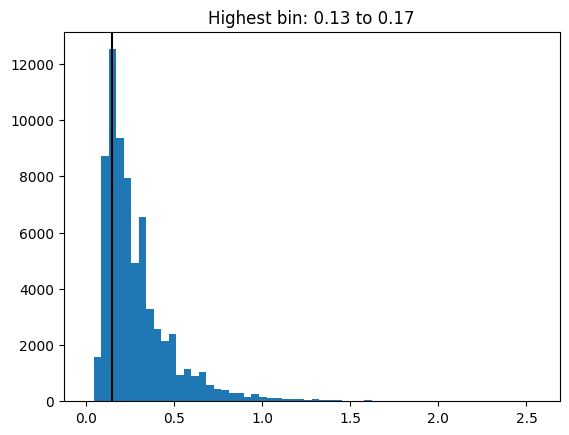

In [22]:
file_paths = ['/Users/adampearl/Documents/191/Muon Experiment/muon_mass_calibration1_3_11_25/MassCalibration_data.txt','/Users/adampearl/Documents/191/Muon Experiment/muon_mass_calibration2_3_11_25/MassCalibration_data.txt', '/Users/adampearl/Documents/191/Muon Experiment/muon_mass_calibration3_3_11_25/MassCalibration_data.txt']

raw_data = read_data(file_paths)
mask = ~np.isnan(raw_data)
data = raw_data[mask]

num_bins = 60

# Get histogram data without plotting
counts, bin_edges = np.histogram(data, bins=num_bins)

# Find the index of the bin with the highest count
max_index = np.argmax(counts)
max_count = counts[max_index]
max_bin_start = bin_edges[max_index]
max_bin_end = bin_edges[max_index + 1]

print(f"Max bin: {max_bin_start:.2f} to {max_bin_end:.2f} with count {max_count}")
print(f"Value {(max_bin_end + max_bin_start)/2}")
print(f"Error {np.std(data) / np.sqrt(len(data))}")
plt.axvline((max_bin_end + max_bin_start)/2, color = 'black' )
# Plot the histogram
plt.hist(data, bins=num_bins)
plt.title(f'Highest bin: {max_bin_start:.2f} to {max_bin_end:.2f}')
plt.show()

In [25]:
if np.isnan(data).any():
    print("There is at least one NaN value in the data.")

There is at least one NaN value in the data.


In [25]:
2*(2.3/0.15)*(1.753*1.08*2.7)

156.760272

In [30]:
#conversion
2*(2.5/0.15)*(1.753*1.08*2.7)

170.39160000000004

In [13]:
#mass data
file_path = '/Users/adampearl/Documents/191/GitHub/muon-lifetime-191-s25/raw_data/lifetimeMass_data.txt'
df = pd.read_csv(file_path, sep='\t', header=None)
df.columns = ['Time', 'Pulse', 'Lifetime']

mask = ~np.isnan(df)
df = df[mask]
print(np.shape(df))



(50250, 3)


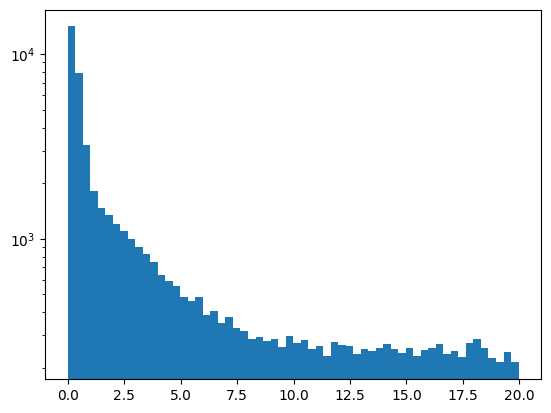

In [14]:
_ = plt.hist(df['Lifetime'] , log = True, bins = 60)

2.56
2.56


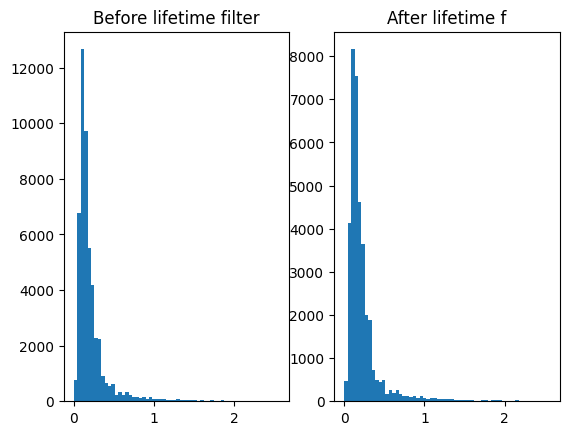

In [33]:
# filter below ten ms
fig, ax = plt.subplots(1,2)
filtered_df = df[df['Lifetime'] < 5]
q = ax[0].hist(df['Pulse'], bins = 60, log = False)
q = ax[1].hist(filtered_df['Pulse'], bins = 60,log = False)
ax[0].set_title("Before lifetime filter")
ax[1].set_title("After lifetime f")

print(np.max(df['Pulse']))
print(np.max(filtered_df['Pulse']))


(array([30., 24., 26., 13., 29., 22., 15., 18., 17.,  6.]),
 array([1.86, 1.93, 2.  , 2.07, 2.14, 2.21, 2.28, 2.35, 2.42, 2.49, 2.56]),
 <BarContainer object of 10 artists>)

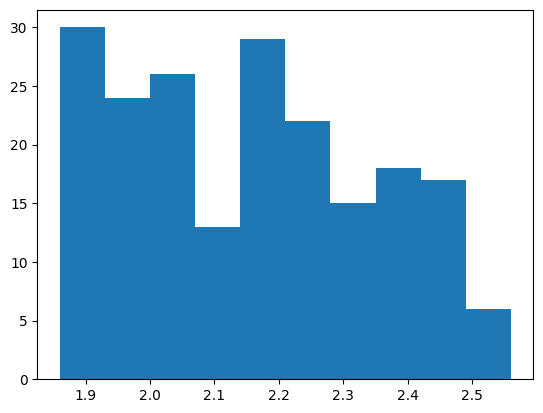

In [24]:
# look at lifetimes of high pulses
filtered_df_sorted = filtered_df.sort_values(by='Pulse', ascending=False)
plt.hist(filtered_df_sorted['Pulse'][:200])


In [ ]:
#E(theta)

def E_scatter(theta, m_mu, m_e):
    a = (1-np.cos(theta)**2)
    b = 2*m_mu*np.cos(theta)**2
    c = -(m_mu**2*np.cos(theta)**2 - m_e**2)
    Eplus = (-b + np.sqrt(b**2 - 4*a*c))/(2*a)
    Eminus = (-b - np.sqrt(b**2 - 4*a*c))/(2*a)
    return (Eplus, Eminus) 
#energy distribution due to geometry
def E_geom(theta, d, y,E0, dE_dx): #d is half the width of the scintillator!
    D = E0/dE_dx
    if theta >= 0 and theta < np.pi:
        p =  np.min([(d-y)/np.sin(theta), D])
    elif theta >= np.pi and theta <= 2*np.pi:
        p =  np.min([(-d-y)/np.sin(theta), D])
    else:
        raise ValueError(f'theta = {theta}')
    return dE_dx*p


/var/folders/11/tl3ls3ln7ys_dhylsjhy27z00000gn/T/ipykernel_66973/634203698.py:14: RuntimeWarning: divide by zero encountered in scalar divide
  p =  np.min([(d-y)/np.sin(theta), D])


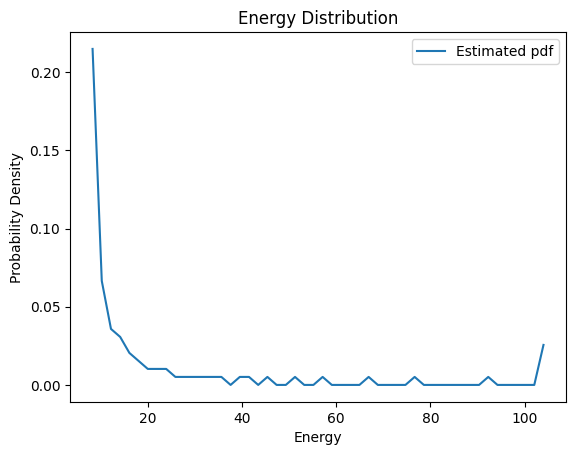

In [90]:

#5MeV/g/cm^2 * rho = 1.08 
dE_dx = 5*1.08
d = 2.7 / 2
E0 = 105
y = 0
theta = np.linspace(0, 2*np.pi, 200)
E_theta = np.zeros_like(theta)
for i in range(len(theta)):
    E_theta[i] = E_geom(theta[i], d, y, E0,dE_dx)


# Create a histogram with density=True to get a probability density
counts, bins = np.histogram(E_theta, bins=50, density=True)
bin_centers = 0.5 * (bins[1:] + bins[:-1])

# Plot the estimated pdf of energy
plt.plot(bin_centers, counts, label='Estimated pdf')
plt.xlabel('Energy')
plt.ylabel('Probability Density')
plt.title('Energy Distribution')
plt.legend()
plt.show()


/var/folders/11/tl3ls3ln7ys_dhylsjhy27z00000gn/T/ipykernel_66973/1081081340.py:7: RuntimeWarning: invalid value encountered in sqrt
  Eplus = (-b + np.sqrt(b**2 - 4*a*c))/(2*a)
/var/folders/11/tl3ls3ln7ys_dhylsjhy27z00000gn/T/ipykernel_66973/1081081340.py:7: RuntimeWarning: invalid value encountered in divide
  Eplus = (-b + np.sqrt(b**2 - 4*a*c))/(2*a)
/var/folders/11/tl3ls3ln7ys_dhylsjhy27z00000gn/T/ipykernel_66973/1081081340.py:8: RuntimeWarning: invalid value encountered in sqrt
  Eminus = (-b - np.sqrt(b**2 - 4*a*c))/(2*a)
/var/folders/11/tl3ls3ln7ys_dhylsjhy27z00000gn/T/ipykernel_66973/1081081340.py:8: RuntimeWarning: divide by zero encountered in divide
  Eminus = (-b - np.sqrt(b**2 - 4*a*c))/(2*a)


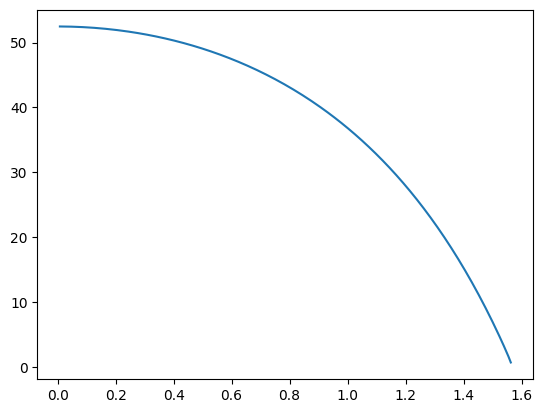

In [67]:
m_e = 0.5
m_mu = 105

theta = np.linspace(0, np.pi/2, 200)
Eplus, Eminus = E(theta, m_mu, m_e)
plt.plot(theta, Eplus)

# plt.plot(Eplus, np.abs(dtheta_dE)/(2*np.pi))

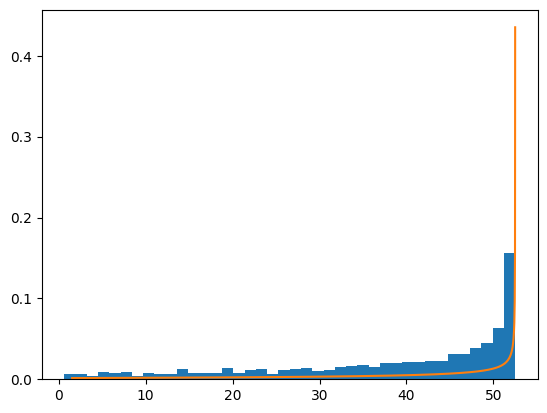

In [68]:
import random
E_hist = [ ]
for i in range(6000):
    random_index = random.choice(range(len(theta)))
    Energy = Eplus[random_index]
    E_hist.append(Energy)

_ = plt.hist(E_hist, bins = 40,density=True)
dtheta_dE = np.gradient(theta, Eplus)
plt.plot(Eplus, np.abs(dtheta_dE)/(2*np.pi))